In [90]:
import pandas as pd


# Data Loading

In [91]:
# Read the data 
df= pd.read_csv('../Data_analyst/customer_shopping_data.csv')

In [92]:
# Check first 5 rows of the dataframe
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# Data exploration and data cleaning

In [153]:
# Check the missing value, and calculate the total missing value for each columns
missing_value = df.isna().sum()

In [154]:
missing_value

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
age_group         0
dtype: int64

In [155]:
# calculate the summary statistics for numeric columns
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [94]:
#format the datetime data type for invoice_date columns before sort the dataframe by invoice_date
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df= df.reset_index(drop=True)



In [96]:
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [97]:
df= df.sort_values('invoice_date')

In [162]:
duplicates = df.duplicated().sum()
duplicates


0

# Data Analysis and Visualization:

In [157]:
df1 = df[['gender', 'category', 'quantity', 'price']]

In [103]:
df1

,gender,category,quantity,price
36199,Female,Food & Beverage,5,26.15
78539,Female,Clothing,4,1200.32
27812,Male,Clothing,3,900.24
27856,Male,Food & Beverage,4,20.92
5323,Male,Clothing,1,300.08
...,...,...,...,...
20863,Female,Clothing,5,1500.40
20879,Female,Food & Beverage,3,15.69
61644,Female,Cosmetics,5,203.30
27871,Female,Shoes,3,1800.51


In [104]:
grouped_1 = df1.groupby(['gender', 'category'])[['quantity', 'price']].sum().reset_index()

In [105]:
grouped_1

,gender,category,quantity,price
0,Female,Books,8776,132956.40
1,Female,Clothing,62039,18616663.12
2,Female,Cosmetics,27261,1108432.26
3,Female,Food & Beverage,26362,137873.26
4,Female,Shoes,17906,10746644.02
5,Female,Souvenir,8976,105288.48
6,Female,Technology,8977,9425850.00
7,Female,Toys,18362,658094.08
8,Male,Books,6206,94020.90
9,Male,Clothing,41519,12459021.52


In [106]:
comparison_1 = grouped_1.pivot(index ='category', columns = 'gender', values = 'quantity')

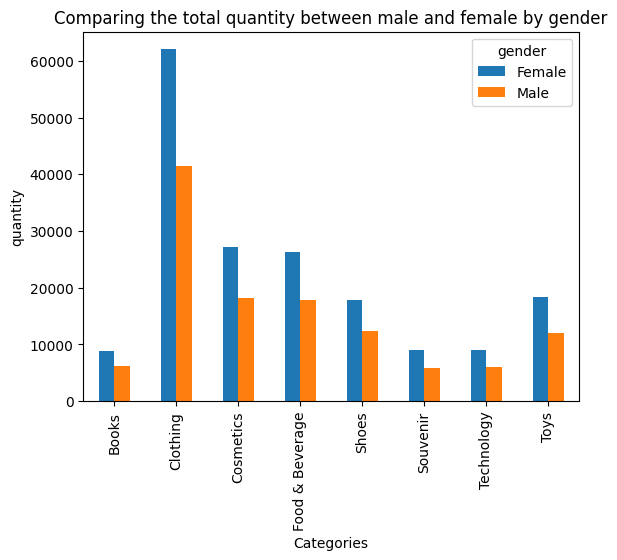

In [163]:
import matplotlib.pyplot as plt
#Bar plot, used to compare discrete categories by displaying rectangular bars.
comparison_1.plot(kind='bar')
plt.title('Comparing the total quantity between male and female by gender')
plt.xlabel('Categories')
# plt.xticks(rotation=45) will Rotate x-axis labels by 45 degrees
# plt.xticks(fontsize=12) will change the font-size of x-axis labels

plt.ylabel('quantity')
plt.legend(title='gender')
plt.show()

In [108]:
grouped_2 = df1.groupby(['category'])[['quantity', 'price']].sum().reset_index()

In [109]:
grouped_2

,category,quantity,price
0,Books,14982,226977.30
1,Clothing,103558,31075684.64
2,Cosmetics,45465,1848606.90
3,Food & Beverage,44277,231568.71
4,Shoes,30217,18135336.89
5,Souvenir,14871,174436.83
6,Technology,15021,15772050.00
7,Toys,30321,1086704.64


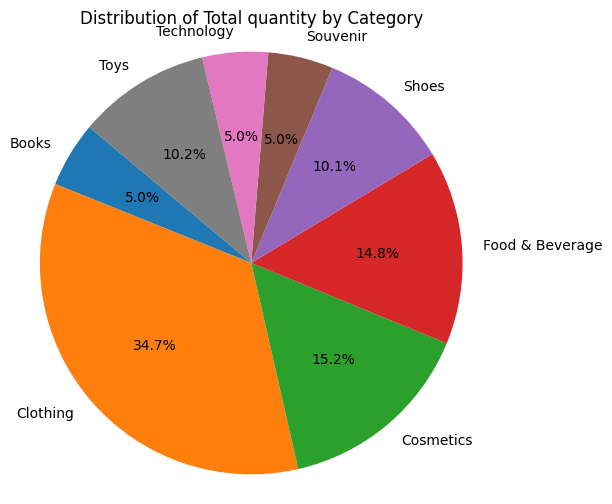

In [110]:
plt.figure(figsize= (6, 6))
plt.pie(grouped_2['quantity'], labels=grouped_2['category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total quantity by Category')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [111]:
comparison_2= grouped_1.pivot(index = 'category', columns ='gender', values ='price')

In [112]:
comparison_2

gender,Female,Male
category,,
Books,132956.40,94020.90
Clothing,18616663.12,12459021.52
Cosmetics,1108432.26,740174.64
Food & Beverage,137873.26,93695.45
Shoes,10746644.02,7388692.87
Souvenir,105288.48,69148.35
Technology,9425850.00,6346200.00
Toys,658094.08,428610.56


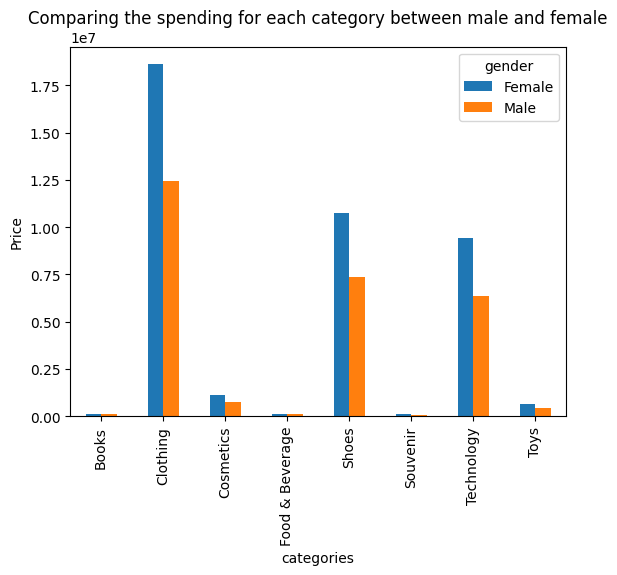

In [113]:
comparison_2.plot(kind='bar')
plt.title('Comparing the spending for each category between male and female')
plt.xlabel('categories')
plt.ylabel('Price')
plt.legend(title='gender')
plt.show()

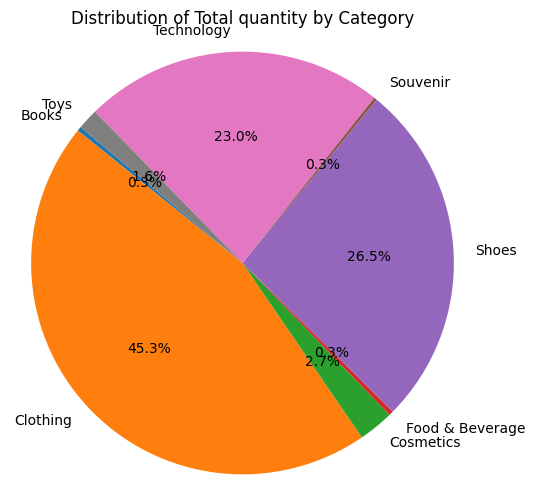

In [118]:
plt.figure(figsize=(6,6))
plt.pie(grouped_2['price'], labels= grouped_2['category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total quantity by Category')
plt.axis('equal')
plt.show()

In [119]:
#Divide age into 3 group:
# bins  defines the age ranges for the categories

age_groups = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=["<30", "30-50", "50+"])


In [121]:
df['age_group'] = age_groups

If we want to get whole dataframe after use groupby, we will use agg function like this:
grouped_3 = df.groupby(['category', 'age_group']).agg({'quantity': 'sum', 'price': 'sum'}).reset_index()

In [143]:
# This way will only return the 4 columns
grouped_3 = df.groupby(['category', 'age_group'])[['quantity', 'price']].sum().reset_index()

In [144]:
grouped_3

,category,age_group,quantity,price
0,Books,<30,3839,58160.85
1,Books,30-50,5700,86355.00
2,Books,50+,5443,82461.45
3,Clothing,<30,26094,7830287.52
4,Clothing,30-50,39777,11936282.16
5,Clothing,50+,37687,11309114.96
6,Cosmetics,<30,11203,455513.98
7,Cosmetics,30-50,17566,714233.56
8,Cosmetics,50+,16696,678859.36
9,Food & Beverage,<30,11051,57796.73


In [145]:
comparison_3 = grouped_3.pivot(index = 'category', columns = 'age_group', values = 'quantity')

In [138]:
comparison_3

age_group,<30,30-50,50+
category,,,
Books,3839,5700,5443
Clothing,26094,39777,37687
Cosmetics,11203,17566,16696
Food & Beverage,11051,17218,16008
Shoes,7684,11634,10899
Souvenir,3767,5708,5396
Technology,3681,5930,5410
Toys,7853,11473,10995


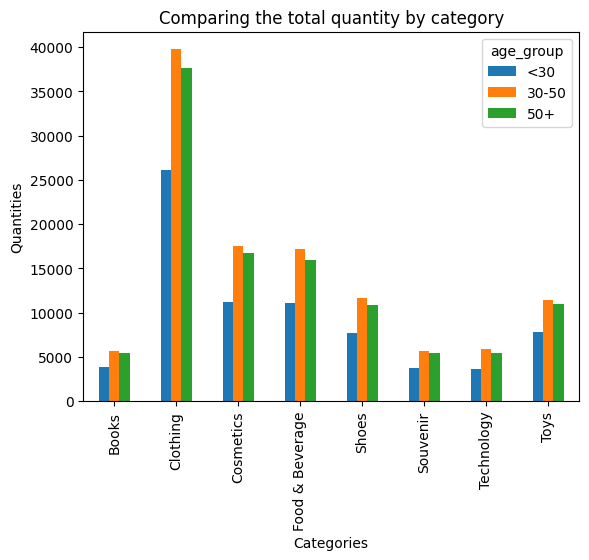

In [148]:
comparison_3.plot(kind ='bar')
plt.title('Comparing The Total Quantity among Three groups of Age by category')
plt.xlabel("Categories")
plt.ylabel('Quantities')
plt.legend(title="age_group")
plt.show()

In [149]:
grouped_4 = df.groupby('shopping_mall')[['quantity', 'price']].sum().reset_index()

In [150]:
grouped_4

,shopping_mall,quantity,price
0,Cevahir AVM,14949,3433671.84
1,Emaar Square Mall,14501,3390408.31
2,Forum Istanbul,14852,3336073.82
3,Istinye Park,29465,6717077.54
4,Kanyon,59457,13710755.24
5,Mall of Istanbul,60114,13851737.62
6,Metrocity,44894,10249980.07
7,Metropol AVM,30530,6937992.99
8,Viaport Outlet,14716,3414019.46
9,Zorlu Center,15234,3509649.02


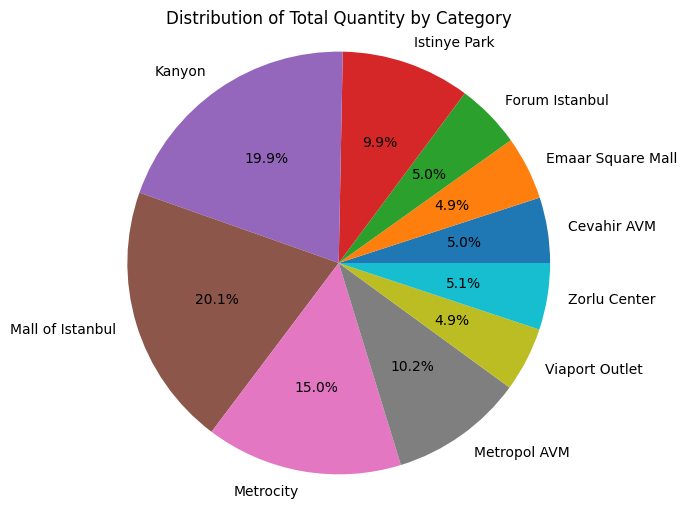

In [152]:
plt.figure(figsize=(6, 6))
plt.pie(grouped_4['quantity'], labels= grouped_4['shopping_mall'], autopct ="%1.1f%%")
plt.title('Distribution of Total Quantity  by Category')
plt.axis('equal')
plt.show()